# **Filtering DataFrames**
---
Data filtering is a way to select specific rows from a dataset based on some **conditions / logic**

### Parsing the Datasets into DataFrames

In [2]:
import pandas as pd
titanic = pd.read_csv("/content/titanic.csv")
houses = pd.read_csv("/content/kc_house_data.csv")
netflix = pd.read_csv("/content/netflix_titles.csv", delimiter="|", index_col=0)

### A `Series` of Boolean Values

In [3]:
# Working with the titanic.csv Dataset
df = titanic.head()

In [4]:
# Filter df by sex, where the sex == "female"
df["sex"]

0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: object

In [5]:
# Returns a Series with Boolean values corresponding to the result of the condition
df["sex"] == "female"

0     True
1    False
2     True
3    False
4     True
Name: sex, dtype: bool

In [ ]:
# Returns a Boolean Series
type(df["sex"] == "female")

### Filtering a `DataFrame` using a Boolean `Series`



In [7]:
"""
Hence, filtering the rows where sex == "female"
  plug the Boolean Series [df["sex"]=="female"] to the DataFrame
"""
df[df["sex"]=="female"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


### Filtering with comparison operators


#### `==` (Equal)

In [8]:
# Filter by the number of people who survived in the titanic dataset
titanic[titanic["survived"]==1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63,0,0,4134,9.5875,?,S,15,?,?
1277,3,1,"Vartanian, Mr. David",male,22,0,0,2658,7.225,?,C,13 15,?,?
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38,0,0,2688,7.2292,?,C,C,?,?
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,?,S,?,?,?


#### `!=` (Not Equal)

In [9]:
# Get the rows for which the passengers were not in Passenger Class 1
titanic[titanic["pclass"]!=1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
323,2,0,"Abelson, Mr. Samuel",male,30,1,0,P/PP 3381,24,?,C,?,?,"Russia New York, NY"
324,2,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24,?,C,10,?,"Russia New York, NY"
325,2,0,"Aldworth, Mr. Charles Augustus",male,30,0,0,248744,13,?,S,?,?,"Bryn Mawr, PA, USA"
326,2,0,"Andrew, Mr. Edgardo Samuel",male,18,0,0,231945,11.5,?,S,?,?,"Buenos Aires, Argentina / New Jersey, NJ"
327,2,0,"Andrew, Mr. Frank Thomas",male,25,0,0,C.A. 34050,10.5,?,S,?,?,"Cornwall, England Houghton, MI"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


#### `> < >= <=`

In [10]:
# Get the houses for which the price is greater than 5 Mil.
houses[houses["price"] > 5000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [11]:
# Filter out the houses with greater than 10 bedrooms
houses[houses["bedrooms"] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [12]:
# Filter out the houses with greater than, or equal to 10 bedrooms
houses[houses["bedrooms"] >= 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


### `Series.between()`   

> `Series.between(left, right, inclusive='both')`   
> Returns a `Series` representing whether each element is between left and right **(inclusive)**
+ `inclusive = ` can be set to: `both`, `neither`, `left` or `right`

In [13]:
# Filter houses that have between 5 & 7 inclusive
houses[houses["bedrooms"].between(5, 7, inclusive="both")]["bedrooms"].value_counts()

5    1601
6     272
7      38
Name: bedrooms, dtype: int64

In [14]:
# Find houses that have construction grade between 11 and 13 inclusive
houses["grade"].between(11, 13, inclusive="both").value_counts()

False    21111
True       502
Name: grade, dtype: int64

### `Series.isin(values)`   
> Return a boolean `Series` showing whether each element in the Series matches an element in the passed sequence of `values` exactly.

In [15]:
# From the netflix.csv Dataset, find the films that were released in India, Japan, Kenya & South Korea
countries = ["India", "Japan", "South Korea", "Kenya"]
netflix["country"].isin(countries)

0       False
1       False
2       False
3       False
4        True
        ...  
8802    False
8803    False
8804    False
8805    False
8806     True
Name: country, Length: 8807, dtype: bool

In [16]:
netflix[netflix["country"].isin(countries)]["country"].value_counts()

India          972
Japan          245
South Korea    199
Kenya            3
Name: country, dtype: int64

In [17]:
# Find TV-MA & R rated movies (mature content)
mature = netflix["rating"].isin(["R", "TV-MA"])

netflix[mature]["rating"].value_counts()

TV-MA    3207
R         799
Name: rating, dtype: int64

### Combining conditions using `&`
> **Both** sides of the condition **have to be** `True` for the entire condition to evaluate to `True`

In [18]:
# From the titanic.csv Dataset, find the femails who did not survive
dead_females = (titanic["survived"] == 0) & (titanic["sex"] == "female")
titanic[dead_females].index.size

127

In [19]:
# From the houses DataSet, find the houses that are waterfront, but their price is under 500,000
good_homes = (houses["price"] <500000)  & (houses["waterfront"] == 1)
houses[good_homes]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
264,2123039032,20141027T000000,369900.0,1,0.75,760,10079,1.0,1,4,...,5,760,0,1936,0,98070,47.4683,-122.438,1230,14267
1168,3523029041,20141009T000000,290000.0,2,0.75,440,8313,1.0,1,3,...,5,440,0,1943,0,98070,47.4339,-122.512,880,26289
1949,1922039062,20150420T000000,480000.0,2,1.50,1008,26487,1.0,1,4,...,6,1008,0,1943,2002,98070,47.3853,-122.479,1132,24079
3829,8550001515,20141001T000000,429592.0,2,2.75,1992,10946,1.5,1,4,...,6,1288,704,1903,0,98070,47.3551,-122.475,1110,8328
6102,222029026,20140917T000000,340000.0,2,0.75,1060,48292,1.0,1,2,...,6,560,500,1947,0,98070,47.4285,-122.511,750,80201
8277,221029019,20150428T000000,400000.0,3,2.50,2090,32718,2.0,1,4,...,7,1550,540,1919,1983,98070,47.3338,-122.511,1200,192268
8450,121039042,20150313T000000,425000.0,3,2.75,3610,107386,1.5,1,3,...,8,3130,480,1918,1962,98023,47.3351,-122.362,2630,42126
11556,2013802030,20140911T000000,357000.0,3,2.00,2460,53882,1.0,1,4,...,7,2460,0,1955,0,98198,47.3811,-122.325,2660,32625
14827,2423029009,20140617T000000,465000.0,2,2.00,1494,19271,2.0,1,4,...,7,1494,0,1943,1997,98070,47.4728,-122.497,1494,43583
16570,2923039243,20141113T000000,340000.0,4,1.00,1200,11834,1.0,1,3,...,6,1200,0,1972,0,98070,47.4557,-122.443,1670,47462


In [20]:
# From the houses Dataset, find the houses with the best view (4), grade >=11 and whose sqft_living is <= 3000
ideal_homes = (houses["view"] == 4) & (houses["grade"] >= 11) & (houses["sqft_living"] <=3000)
houses[ideal_homes]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4013,724069059,20140509T000000,2400000.0,3,2.25,3000,11665,1.5,1,4,...,11,3000,0,2001,0,98075,47.5884,-122.086,3000,15959


### Combining conditions using `|`
> **Only one side of** the sides of the condition **has to be** `True` for the entire condition to evaluate to `True`

In [21]:
# From the houses.csv Dataset, find houses that were built or renovated after 2014
recent = (houses["yr_built"] >= 2014) | (houses["yr_renovated"] >= 2014)
houses[recent].index.size

704

In [22]:
"""
From the netflix Dataset, find movies that were directed by either David Fincher of Martin Scorsese
  and were released after 2015
"""
dav_marty = (netflix["director"].isin(["David Fincher", "Martin Scorsese"])) & (netflix["release_year"] > 2015)
netflix[dav_marty].index.size

3

### Bitwise negation using `~`
> Can be used to negate / invert / flip a Boolean `Series` or criteria that was used to filter values out of a DataFrame



In [23]:
dummy = titanic.head()

# Get a Boolean Series out of the DataFrame
lived = dummy["survived"] == 1
lived

0     True
1     True
2    False
3    False
4    False
Name: survived, dtype: bool

In [24]:
# Negate / flip that boolean series to people who DID NOT live
~lived

0    False
1    False
2     True
3     True
4     True
Name: survived, dtype: bool

In [25]:
# Hence selecting the passengers who did not live would be like:
dummy[~lived]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [26]:
# From the houses.csv Dataset, find houses that were bult or renovated BEFORE 2014
recent = (houses["yr_built"] >= 2014) | (houses["yr_renovated"] >= 2014)

# Can also be achieved by simply flipping the criteria, to houses that are NOT recent
houses[~recent].index.size

20909

### `Series.isna()` and `Series.notna()` methods   
+ `Series.isna()` - Returns a mask of bool values for each element in the `Series` that indicates whether an element is an NA (Nan or None) value.   

+ `Series.notna()` - Inverse of `Series.isna()`

In [27]:
# The netflix_titles.csv Datset has lots of null values in the director column
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.5+ KB


In [28]:
# Hence, let's filter out rows with no director
netflix[netflix["director"].isna()].index.size

2634

In [29]:
# Let's filter out rows with missing directors as well as cast
missing = netflix["director"].isna() & netflix["cast"].isna()
netflix[missing].index.size

352

### Basic plotting with filtered data

In [30]:
# How many women vs men that survived in the titanic?
not_die = titanic["survived"] == 1
titanic[not_die]["sex"].value_counts()

female    339
male      161
Name: sex, dtype: int64

<Axes: title={'center': 'Male vs Female Survivors (Titanic)'}>

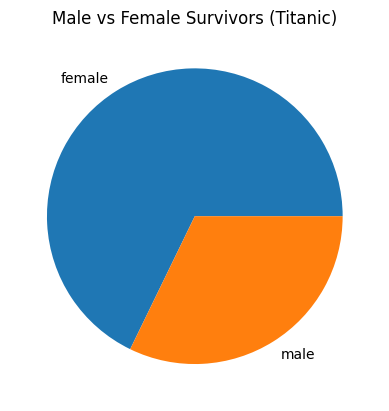

In [31]:
# Make a pie chart out of that
titanic[not_die]["sex"].value_counts().plot(kind = "pie", title="Male vs Female Survivors (Titanic)", ylabel="")

# **Exercise Time!** 💪 💪 💪
---
**Work with the `bestsellers.csv` dataset to answer the following questions:**

##### Find the books written by Pete Souza

In [32]:
# Parse the Dataset into a DataFrame
bestsellers = pd.read_csv("/content/bestsellers.csv")
bestsellers.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [33]:
# Books written by Pete Souza
pete = bestsellers["Author"].isin(["Pete Souza"]) #bestsellers["Author"] == "Pete Souza"
bestsellers[pete]

,Name,Author,User Rating,Reviews,Price,Year,Genre
244,Obama: An Intimate Portrait,Pete Souza,4.9,3192,22,2017,Non Fiction


##### Find the books that are under 10 dollars

In [34]:
under_10 = bestsellers["Price"] < 10
bestsellers[under_10]

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


##### Find the books that have a price between 50 and 60 dollars

In [35]:
betwn_50_60 = bestsellers["Price"].between(50, 60, inclusive="neither")
bestsellers[betwn_50_60]

,Name,Author,User Rating,Reviews,Price,Year,Genre
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction


##### Find all the books written by Kristin Hannah, Andy Weir, or Delia Owens

In [36]:
writers = ["Kristin Hannah" , "Andy Weir", "Delia Owens"]
bestsellers[bestsellers["Author"].isin(writers)]

,Name,Author,User Rating,Reviews,Price,Year,Genre
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
438,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2016,Fiction
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


##### Find the Non Fiction books that are rated 4.9

In [37]:
nf_49 = (bestsellers["Genre"] == "Non Fiction")  & (bestsellers["User Rating"] == 4.9)
bestsellers[nf_49]

,Name,Author,User Rating,Reviews,Price,Year,Genre
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction
244,Obama: An Intimate Portrait,Pete Souza,4.9,3192,22,2017,Non Fiction
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction


##### Find the fiction book with the lowest User Rating

In [38]:
bestsellers.sort_values(["User Rating"], ascending=True).iloc[[0]]

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


##### Find 2012's top 5 Fiction books with the most Reviews

In [39]:
fiction_2012 = (bestsellers["Genre"]== "Fiction") & (bestsellers["Year"] == 2012)
#bestsellers[fiction_2012].nsmallest(5, ["Reviews"])
bestsellers[fiction_2012].sort_values(["Reviews"], ascending=True).head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
458,"The Serpent's Shadow (The Kane Chronicles, Boo...",Rick Riordan,4.8,2091,12,2012,Fiction
119,Game of Thrones Boxed Set: A Game of Thrones/A...,George R.R. Martin,4.6,5594,5,2012,Fiction
432,"The Mark of Athena (Heroes of Olympus, Book 3)",Rick Riordan,4.8,6247,10,2012,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


##### Create a bar plot showing the 5 authors who have the most books with a rating under 4.5

In [40]:
rate_filter = bestsellers["User Rating"] < 45
bestsellers[rate_filter]["Author"].value_counts().head()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Name: Author, dtype: int64

<Axes: title={'center': 'Authors vs No. of Books'}, xlabel='No. of Books', ylabel='Authors'>

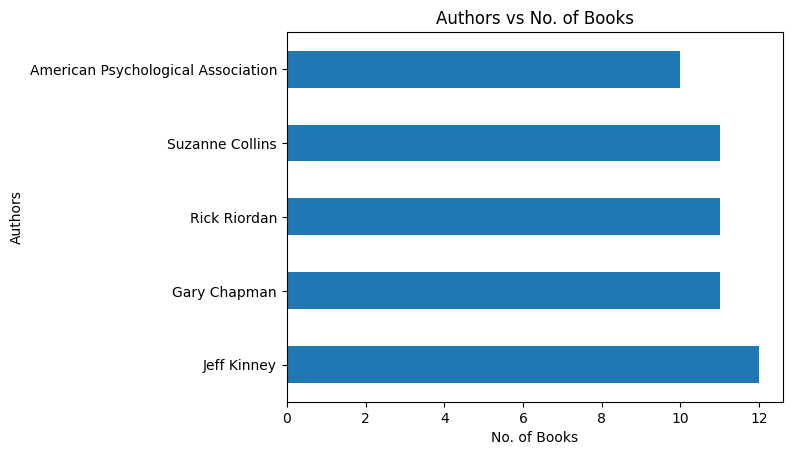

In [41]:
bestsellers[rate_filter]["Author"].value_counts().head().plot(kind="barh", ylabel="Authors", xlabel="No. of Books", title="Authors vs No. of Books")